# Exercises - Evaluate

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load your zillow dataset.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import pearsonr, spearmanr

from sklearn.model_selection import train_test_split

import wrangle

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [2]:
train, validate, test = wrangle.wrangle_zillow()
train.head()

,bedrooms,bathrooms,square_footage,tax_value,year_built,tax_amount,fips
553191,4.0,2.0,1556,373090,1923,4579.25,6037
1209132,3.0,2.0,1513,74070,1937,986.55,6037
174634,4.0,2.0,2040,138000,1954,2553.05,6037
170584,3.0,2.0,1834,263870,1959,3139.76,6059
2001226,2.0,2.0,1225,335603,1975,3461.38,6059


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

In [ ]:
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)


Modify and add to the code above as necessary for it to work with the zillow dataset.

In [40]:
baseline = round(train['tax_value'].mean(), 2)

In [41]:
preds = train[['square_footage', 'tax_value']]

In [42]:
preds['baseline_preds'] = baseline
preds.head()

/var/folders/2g/_40bymd11_x47n42bls8ypmr0000gn/T/ipykernel_1223/3933155626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['baseline_preds'] = baseline


,square_footage,tax_value,baseline_preds
553191,1556,373090,461201.97
1209132,1513,74070,461201.97
174634,2040,138000,461201.97
170584,1834,263870,461201.97
2001226,1225,335603,461201.97


In [43]:
ols_model = LinearRegression()
ols_model.fit(train[['square_footage']], train[['tax_value']])

LinearRegression()

In [44]:
preds['yhat'] = ols_model.predict(train[['square_footage']])
preds.head()

/var/folders/2g/_40bymd11_x47n42bls8ypmr0000gn/T/ipykernel_1223/1907124346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['yhat'] = ols_model.predict(train[['square_footage']])


,square_footage,tax_value,baseline_preds,yhat
553191,1556,373090,461201.97,356285.426759
1209132,1513,74070,461201.97,341663.043655
174634,2040,138000,461201.97,520872.250533
170584,1834,263870,461201.97,450820.833803
2001226,1225,335603,461201.97,243727.082401


3. Plot the residuals for the linear regression model that you made.

In [45]:
preds['baseline_res'] = preds['baseline_preds'] - preds['tax_value']
preds.head()

/var/folders/2g/_40bymd11_x47n42bls8ypmr0000gn/T/ipykernel_1223/507902786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['baseline_res'] = preds['baseline_preds'] - preds['tax_value']


,square_footage,tax_value,baseline_preds,yhat,baseline_res
553191,1556,373090,461201.97,356285.426759,88111.97
1209132,1513,74070,461201.97,341663.043655,387131.97
174634,2040,138000,461201.97,520872.250533,323201.97
170584,1834,263870,461201.97,450820.833803,197331.97
2001226,1225,335603,461201.97,243727.082401,125598.97


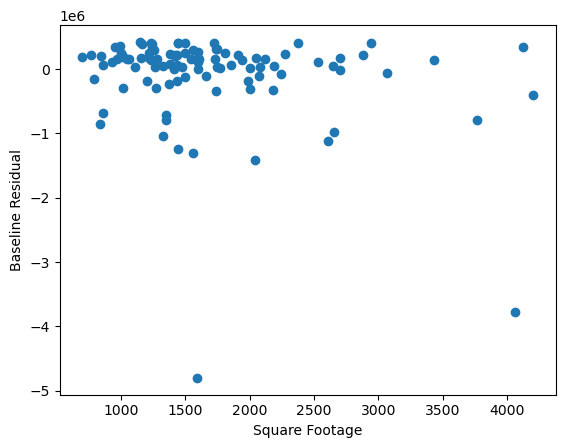

In [46]:
plt.scatter(preds['square_footage'].sample(100), preds['baseline_res'].sample(100))
plt.xlabel('Square Footage')
plt.ylabel('Baseline Residual')
plt.show()

In [47]:
preds['yhat_res'] = preds['yhat'] - preds['tax_value']
preds.head()

/var/folders/2g/_40bymd11_x47n42bls8ypmr0000gn/T/ipykernel_1223/2865484425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['yhat_res'] = preds['yhat'] - preds['tax_value']


,square_footage,tax_value,baseline_preds,yhat,baseline_res,yhat_res
553191,1556,373090,461201.97,356285.426759,88111.97,-16804.573241
1209132,1513,74070,461201.97,341663.043655,387131.97,267593.043655
174634,2040,138000,461201.97,520872.250533,323201.97,382872.250533
170584,1834,263870,461201.97,450820.833803,197331.97,186950.833803
2001226,1225,335603,461201.97,243727.082401,125598.97,-91875.917599


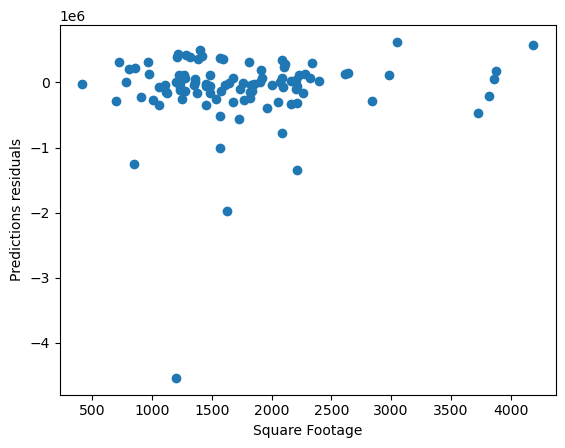

In [48]:
plt.scatter(preds['square_footage'].sample(100), preds['yhat_res'].sample(100))
plt.xlabel('Square Footage')
plt.ylabel('Predictions residuals')
plt.show()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [49]:
preds['baseline_res_squared'] = preds['baseline_res']  ** 2
preds['yhat_res_squared'] = preds['yhat_res'] ** 2
preds.head()

,square_footage,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
553191,1556,373090,461201.97,356285.426759,88111.97,-16804.573241,7.763719e+09,2.823937e+08
1209132,1513,74070,461201.97,341663.043655,387131.97,267593.043655,1.498712e+11,7.160604e+10
174634,2040,138000,461201.97,520872.250533,323201.97,382872.250533,1.044595e+11,1.465912e+11
170584,1834,263870,461201.97,450820.833803,197331.97,186950.833803,3.893991e+10,3.495061e+10
2001226,1225,335603,461201.97,243727.082401,125598.97,-91875.917599,1.577510e+10,8.441184e+09


In [50]:
sse_baseline = preds['baseline_res_squared'].sum()
sse_yhat = preds['yhat_res_squared'].sum()
sse_baseline, sse_yhat

(5.403229569246861e+17, 3.7790273011362477e+17)

In [51]:
preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
preds.head()

,square_footage,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res
553191,1556,373090,461201.97,356285.426759,88111.97,-16804.573241,7.763719e+09,2.823937e+08,-104916.543241
1209132,1513,74070,461201.97,341663.043655,387131.97,267593.043655,1.498712e+11,7.160604e+10,-119538.926345
174634,2040,138000,461201.97,520872.250533,323201.97,382872.250533,1.044595e+11,1.465912e+11,59670.280533
170584,1834,263870,461201.97,450820.833803,197331.97,186950.833803,3.893991e+10,3.495061e+10,-10381.136197
2001226,1225,335603,461201.97,243727.082401,125598.97,-91875.917599,1.577510e+10,8.441184e+09,-217474.887599


In [52]:
preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
preds.head()

,square_footage,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
553191,1556,373090,461201.97,356285.426759,88111.97,-16804.573241,7.763719e+09,2.823937e+08,-104916.543241,1.100748e+10
1209132,1513,74070,461201.97,341663.043655,387131.97,267593.043655,1.498712e+11,7.160604e+10,-119538.926345,1.428955e+10
174634,2040,138000,461201.97,520872.250533,323201.97,382872.250533,1.044595e+11,1.465912e+11,59670.280533,3.560542e+09
170584,1834,263870,461201.97,450820.833803,197331.97,186950.833803,3.893991e+10,3.495061e+10,-10381.136197,1.077680e+08
2001226,1225,335603,461201.97,243727.082401,125598.97,-91875.917599,1.577510e+10,8.441184e+09,-217474.887599,4.729533e+10


In [53]:
ess_baseline = 0
ess_yhat = preds['yhat_mean_res_squared'].sum()
ess_yhat

1.6242022681105974e+17

In [54]:
tss_baseline = sse_baseline + ess_baseline
tss_baseline

5.403229569246861e+17

In [55]:
mse_baseline = sse_baseline / len(preds)
mse_yhat = sse_yhat / len(preds)
mse_baseline, mse_yhat

(452941865226.9652, 316788256464.7095)

In [56]:
rmse_baseline = sqrt(mse_baseline)
rmse_yhat = sqrt(mse_yhat)
rmse_baseline, rmse_yhat

(673009.5580502294, 562839.4588732292)

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [58]:
preds['baseline_preds']
sse_baseline = preds['baseline_res_squared'].sum()
sse_baseline

5.403229569246861e+17

In [59]:
mse_baseline = sse_baseline / len(preds)
mse_baseline

452941865226.9652

In [60]:
rmse_baseline = sqrt(mse_baseline)
rmse_baseline

673009.5580502294

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [62]:
if sse_yhat < sse_baseline:
    print('Model outperforms baseline model.')
else:
    print('Baseline model outperforms the model')

Model outperforms baseline model.


7. What is the amount of variance explained in your model?

In [63]:
amount_variance = sse_baseline - sse_yhat
amount_variance

1.624202268110613e+17

In [79]:
explained_variance_score(preds['tax_value'], preds['yhat'])

0.30059841938883325

8. Is your model better than the baseline model?

In [80]:
if rmse_yhat < rmse_baseline:
    print('Model outperfomrs the baseline')
else:
    print('Baseline outperforms the model')

Model outperfomrs the baseline


9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot

In [83]:
def plot_residuals(y, yhat):
    ''' This function creates a residual plot'''
    plt.scatter(y, (yhat - y))
    plt.xlabel('yhat')
    plt.ylael('residuals')
    plt.show()
    


- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)

In [68]:
def regression_errors(y, yhat):
    '''This function returns the values for SSE, ESS, TSS, MSE, and RMSE'''
    
    preds['yhat_res_squared'] = preds['yhat_res'] ** 2
    sse_yhat = preds['yhat_res_squared'].sum()
    
    preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
    preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
    ess_baseline = 0
    ess_yhat = preds['yhat_mean_res_squared'].sum()
    
    tss_yhat = sse_yhat + sse_yhat
    
    mse_yhat = sse_yhat / len(preds)
    
    rmse_yhat = sqrt(mse_yhat)
    
    return sse_yhat, ess_yhat, tss_yhat, mse_yhat, rmse_yhat

- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [69]:
def baseline_mean_errors(y):
    '''This function returns the values for SSE, MSE, and RMSE for the baseline model'''
    preds['baseline_res_squared'] = preds['baseline_res']  ** 2
    sse_baseline = preds['baseline_res_squared'].sum()
    mse_baseline = sse_baseline / len(preds)
    rmse_baseline = sqrt(mse_baseline)
    
    return sse_baseline, mse_baseline, rmse_baseline
    
    
    

In [84]:
baseline_mean_errors(train.tax_value)

(5.403229569246861e+17, 452941865226.9652, 673009.5580502294)

- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [70]:
def better_than_baseline(y, yhat):
    if sse_yhat < sse_baseline:
        return('Model outperforms baseline model.')
    else:
        return('Baseline model outperforms the model')